# From Scratch

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [12]:
points = {"blue": [[2, 4], [1, 3], [2, 3], [3, 2], [2, 1]],
          "red": [[5, 6], [4, 1], [4, 6], [6, 6], [5, 4]]}

In [14]:
new_point = [3, 4]

In [15]:
# getting euclidean distance between two points
def euclidean_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [16]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.point = None
    
    def fit(self, points):
        self.points = points

    def predict(self, new_point):
        distance = []
        
        for category, points in self.points.items():
            for point in points:
                dist = euclidean_distance(point, new_point)
                distance.append([dist, category]) 

        categories = [category[1] for category in sorted(distance)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result

In [17]:
clf = KNN(k=3)
clf.fit(points)
print(clf.predict(new_point))

blue


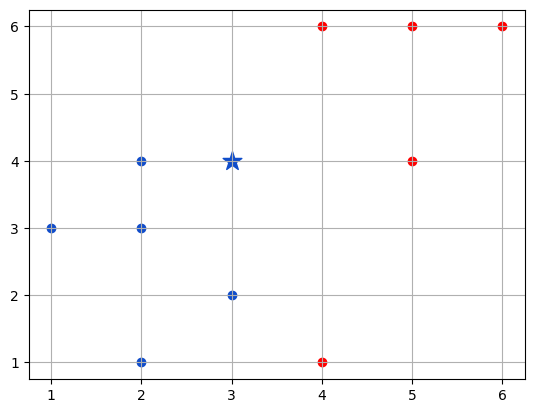

In [23]:
ax = plt.subplot()
ax.grid(True)

for point in points['blue']:
    ax.scatter(point[0], point[1], color="#104dca")
for point in points['red']:
    ax.scatter(point[0], point[1], color="#FF0000")

new_class = clf.predict(new_point)
color = "#FF0000" if new_class == "red" else "#104dca"

ax.scatter(new_point[0], new_point[1], color = color, marker = "*", s=200)
plt.show()

In [24]:
plt.savefig("sample_knn.png")

<Figure size 640x480 with 0 Axes>

#### Another way for With feature & y form

In [ ]:
%%writefile knn.py
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """Store the training data."""
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """Predict the class labels for the input data."""
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        """Predict the class label for a single instance."""
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

Writing knn_new.py


## Using Sklearn

In [30]:
# !pip install scikit-learn

In [45]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
df = pd.read_csv("Classified Data.csv", index_col= 0)
print(df.shape)
df.head()

(1000, 11)


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [36]:
scaler = StandardScaler()
scaler.fit(df.drop(columns=['TARGET CLASS']))
scaler_features = scaler.transform(df.drop(columns=['TARGET CLASS']))
df_features = pd.DataFrame(scaler_features, columns=df.columns[:-1])
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [41]:
X_train, X_test,y_train, y_test = train_test_split(df_features, df["TARGET CLASS"], test_size=0.3, stratify=df['TARGET CLASS'])

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))

[[141   9]
 [  8 142]]


In [53]:
print("Accuracy score", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy score 0.9433333333333334
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       150
           1       0.94      0.95      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



### KNN REG

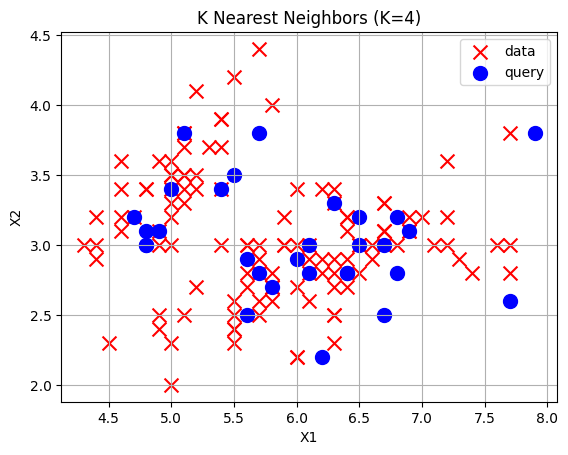

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(42)

class KNN():
    
    def __init__(self, K):
        self.K = K

    def euclidean_distance(self, x1, x2):
        dist = 0
        for i in range(len(x1)):
            dist += np.power((x1[i] - x2[i]), 2)
        return np.sqrt(dist)
    
    def knn_search(self, X_train, y_train, Q):
        y_pred = np.empty(Q.shape[0])        

        for i, query in enumerate(Q):
            #get K nearest neighbors to query point
            idx = np.argsort([self.euclidean_distance(query, x) for x in X_train])[:self.K]            
            #extract the labels of KNN training labels
            knn_labels = np.array([y_train[i] for i in idx])
            #label query sample as the average of knn_labels
            y_pred[i] = np.mean(knn_labels)

        return y_pred 
        

if __name__ == "__main__":
    
    plt.close('all')
        
    #iris dataset
    iris = datasets.load_iris()
    X = iris.data[:,:2]
    y = iris.target            

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    K = 4
    knn = KNN(K)    
    y_pred = knn.knn_search(X_train, y_train, X_test)
    
    plt.figure(1)
    plt.scatter(X_train[:,0], X_train[:,1], s = 100, marker = 'x', color = 'r', label = 'data')
    plt.scatter(X_test[:,0], X_test[:,1], s = 100, marker = 'o', color = 'b', label = 'query')
    plt.title('K Nearest Neighbors (K=%d)'% K)
    plt.legend()
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.show()
    
    


# END